# Import Libraries


In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [108]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [109]:
from matplotlib.colors import ListedColormap

# Data Description

* Dataset 2 is a list bank customers who have a credit card with the bank. It suggests whether a credit 
  card customer is performing good or bad for a bank. It contains 20 features including demographic, 
  socio-economic and transactional variables for 5050 customers who have an active credit card with 
  the bank.
* The data contains a 'class' variable where bad=Customers who are not profitable
  credit card holders for the bank and Good=Customers who are profitable credit card holders for the 
  bank. Customer_id is a unique serial number/identifier of each customer.

# Data Preparation

## Understand the Data

#### Read the dataset and print the first five observations.

In [110]:
# load the csv file
# store the data in 'Data'
Data=pd.read_csv("Dataset 2.csv")

In [111]:
#Create a copy of Data and store it as 'df'
df=Data.copy()

In [112]:
# display first five observations using head()
df.head(5)

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
0,1,<0,19.000000,critical/other existing credit,business,640.000000,<100,unemployed,1,male div/sep,co applicant,1,life insurance,22,stores,for free,110,unemp/unskilled non res,9.000000,yes,no,3463,bad
1,2,<0,60.000000,existing paid,business,903.000000,<100,1<=X<4,2,male div/sep,co applicant,2,real estate,25,bank,for free,400,unemp/unskilled non res,3.000000,none,yes,1048,good
2,3,<0,72.000000,critical/other existing credit,business,523.000000,<100,1<=X<4,2,male div/sep,co applicant,2,life insurance,24,bank,for free,190,unemp/unskilled non res,13.000000,none,no,357,bad
3,4,<0,NaN,existing paid,business,605.000000,<100,4<=X<7,2,male div/sep,co applicant,4,life insurance,30,none,for free,320,skilled,1.000000,none,yes,1296,bad
4,5,<0,67.000000,delayed previously,business,709.000000,<100,1<=X<4,2,male div/sep,co applicant,3,no known property,30,stores,for free,170,unskilled resident,4.000000,yes,no,1015,bad


**Let us now see the number of variables and observations in the data.**

In [113]:
# Lets use 'shape' to check the dimension of data
df.shape

(5050, 23)

**Interpretation:** The data has 5050 observations and 23 variables.

In [114]:
# Let's use 'info()' to understand the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_id             5050 non-null   int64  
 1   checking_status         5050 non-null   object 
 2   duration                5048 non-null   float64
 3   credit_history          5050 non-null   object 
 4   purpose                 5050 non-null   object 
 5   credit_amount           5048 non-null   float64
 6   savings_status          5045 non-null   object 
 7   employment              5049 non-null   object 
 8   installment_commitment  5050 non-null   int64  
 9   personal_status         5050 non-null   object 
 10  other_parties           5050 non-null   object 
 11  residence_since         5050 non-null   int64  
 12  property_magnitude      5049 non-null   object 
 13  age                     5050 non-null   int64  
 14  other_payment_plans     5050 non-null   

## Change the data type as per the data definition.

In [115]:
df.Customer_id = df.Customer_id.astype(str)

In [116]:
#Let's seggergate the columns as numerical and categorical.
df_num=df.select_dtypes(include=int)

In [117]:
df_cat=df.select_dtypes(include="object")

**Get a concise summary of the DataFrame.**

In [118]:
# Summary statistics for numerical columns
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
installment_commitment,5050.000000,3.026139,18.024623,1.000000,2.000000,3.000000,4.000000,772.000000
residence_since,5050.000000,2.549505,1.119351,1.000000,2.000000,3.000000,4.000000,4.000000
age,5050.000000,44.893267,16.725905,19.000000,30.000000,43.000000,59.000000,200.000000
bureau_score,5050.000000,200.471287,155.330759,10.000000,40.000000,190.000000,340.000000,480.000000
Spend_debit_card,5050.000000,2507.577624,1462.481192,-50.000000,1225.000000,2532.500000,3762.750000,5000.000000


In [119]:
# Summary statistics for Categorical columns
df_cat.describe().T

,count,unique,top,freq
Customer_id,5050,5050,1,1
checking_status,5050,4,>=200,1621
credit_history,5050,5,no credits/all paid,1209
purpose,5050,10,business,768
savings_status,5045,5,<100,1787
employment,5049,5,1<=X<4,1169
personal_status,5050,4,male div/sep,2048
other_parties,5050,3,none,2214
property_magnitude,5049,4,car,1349
other_payment_plans,5050,3,none,2174


Skewness is a statistical measure that describes the asymmetry of the probability distribution of a dataset. In the context of machine learning, understanding skewness is crucial as it can impact the performance and accuracy of various algorithms, as well as the interpretation of results.

Skewness can be categorized into three main types:

1. **Positive Skewness (Right Skewness):** In a positively skewed distribution, the tail on the right side is longer or fatter than the left side. This indicates that the majority of the data points are concentrated on the left side, while a few extremely high values pull the mean to the right. The median (middle value) is generally less than the mean in a positively skewed distribution.

2. **Negative Skewness (Left Skewness):** In a negatively skewed distribution, the tail on the left side is longer or fatter than the right side. This suggests that most of the data points are clustered on the right side, while a few very low values pull the mean to the left. The median is typically greater than the mean in a negatively skewed distribution.

3. **No Skewness (Symmetric):** In a symmetric distribution, the data is evenly distributed on both sides of the mean, resulting in a balanced curve without a long tail on either side. The mean and median are generally close to each other in a symmetric distribution.

Interpreting skewness in the context of machine learning involves considering how it can affect various aspects of the modeling process:

1. **Data Preprocessing:** Skewed data can lead to biased models, especially when using algorithms that assume a normal distribution of data. Preprocessing techniques like log transformation, square root transformation, or Box-Cox transformation can be applied to mitigate the effects of skewness and make the distribution more symmetric.

2. **Feature Selection:** Highly skewed features might not contribute effectively to the predictive power of the model, as they might not capture the underlying patterns in the data. Removing or transforming such features can lead to better model performance.

3. **Model Performance:** Some machine learning algorithms, like linear regression, assume a normal distribution of residuals. Skewed data can violate this assumption and affect the accuracy of the model's predictions. Transforming the target variable or applying specialized algorithms that are robust to skewness, such as decision trees or random forests, can be helpful.

4. **Interpretation of Results:** Skewed data can distort the interpretation of results, especially when assessing variable importance or making inferences based on coefficients. Addressing skewness can lead to more accurate interpretations and better insights into the relationships within the data.

5. **Evaluation Metrics:** Skewed datasets can impact the choice of evaluation metrics. For example, when dealing with imbalanced classification problems, accuracy might not be the best metric to assess model performance. Instead, metrics like precision, recall, F1-score, and ROC-AUC are more informative.

In conclusion, understanding and addressing skewness is essential in the context of machine learning. Skewed data can lead to biased models, inaccurate interpretations, and suboptimal performance. By employing appropriate data preprocessing techniques and choosing suitable algorithms, machine learning practitioners can ensure that the impact of skewness on their models is minimized, leading to more robust and reliable results.

In [120]:
#Skewness 
df.skew()

Customer_id               0.000000
duration                 18.327147
credit_amount            66.427323
installment_commitment   40.990854
residence_since          -0.022270
age                       0.454255
bureau_score              0.230494
num_dependents            0.292193
Spend_debit_card         -0.029051
dtype: float64

**Interpretation**

1. **Customer_id:** Skewness = 0.000000
   - A skewness value of 0 suggests that the distribution of customer IDs is approximately symmetric. This means that the customer IDs are evenly distributed without a long tail on either side.

2. **duration:** Skewness = 18.327147
   - A skewness value of 18.327147 indicates strong positive skewness. This suggests that most of the values are concentrated towards the lower end, and there are a few extremely high values that are pulling the mean to the right. The majority of durations are shorter, but there are some significantly longer durations.

3. **credit_amount:** Skewness = 66.427323
   - A skewness value of 66.427323 also indicates very strong positive skewness. This implies that the distribution of credit amounts is heavily skewed towards the lower values, while a few extremely high credit amounts are causing the mean to be pulled to the right.

4. **installment_commitment:** Skewness = 40.990854
   - A skewness value of 40.990854 indicates significant positive skewness. This means that most of the installment commitments have lower values, while a few high values are influencing the mean to be higher.

5. **residence_since:** Skewness = -0.022270
   - A skewness value close to 0 (-0.022270) suggests that the distribution of residence durations is approximately symmetric. There is a balance between shorter and longer residence durations.

6. **age:** Skewness = 0.454255
   - A skewness value of 0.454255 indicates mild positive skewness. This implies that the majority of ages are likely concentrated towards the younger side, but there are also some older ages that are pulling the mean to the right.

7. **bureau_score:** Skewness = 0.230494
   - A skewness value of 0.230494 suggests mild positive skewness. The distribution of bureau scores is slightly skewed, indicating that there might be a few higher scores pulling the mean slightly to the right.

8. **num_dependents:** Skewness = 0.292193
   - A skewness value of 0.292193 indicates mild positive skewness. The majority of instances might have lower numbers of dependents, but there are some cases with higher numbers.

9. **Spend_debit_card:** Skewness = -0.029051
   - A skewness value close to 0 (-0.029051) suggests that the distribution of spending using debit cards is approximately symmetric. There is a balance between lower and higher spending amounts.

In [121]:
#kurtosis
df.kurt()

Customer_id                -1.200000
duration                  570.901048
credit_amount            4550.750729
installment_commitment   1691.552259
residence_since            -1.366822
age                         0.749486
bureau_score               -1.338107
num_dependents             -1.303135
Spend_debit_card           -1.205089
dtype: float64

**Interpretation of Kurtosis in Machine Learning**

1. A **mesokurtic distribution** (kurtosis = 3) closely resembles a normal distribution.
In machine learning, data with this type of distribution might require less preprocessing or transformations when used in models that assume normality, such as linear regression.
Leptokurtic Distribution (Kurtosis > 3):

2. A **leptokurtic distribution** has heavier tails and a sharper peak than a normal distribution.
High kurtosis indicates the presence of more extreme values or outliers in the data's tails.
In machine learning, understanding leptokurtic distributions helps in detecting potential outliers and deciding on appropriate strategies for handling them, such as robust regression techniques.
Platykurtic Distribution (Kurtosis < 3):

3. A **platykurtic distribution** has lighter tails and a flatter peak compared to a normal distribution.
Low kurtosis suggests that the data has fewer extreme values and is more dispersed.
In machine learning, dealing with platykurtic distributions may require special attention when choosing algorithms and feature engineering techniques, as assumptions of normality might not hold.
Assessment of Model Assumptions:

4. Many statistical models, like linear regression, assume that the data is normally distributed. Kurtosis helps assess how well the data fits these assumptions. If the data's kurtosis significantly deviates from 3, it might indicate that the normality assumption doesn't hold, requiring model adjustments or the use of alternative algorithms.

* In summary, kurtosis is a valuable tool in machine learning for understanding the distributional characteristics of data. It guides decision-making regarding data preprocessing, outlier handling, and model selection. However, it's important to note that kurtosis is just one aspect of data analysis, and its interpretation should always be considered alongside other statistical measures and domain knowledge.

### CORRELATION

**Correlation**

* Correlation is a fundamental statistical concept widely used in machine learning to understand relationships between variables. It measures the extent to which two variables change together. In the context of machine learning, correlation helps us uncover patterns, dependencies, and potential predictive power among features, which can guide model selection, feature engineering, and interpretability.

* In machine learning, correlation is valuable for several reasons:

**Feature Selection**: Highly correlated features might carry redundant information, leading to multicollinearity. Identifying and removing such features can improve model stability and generalization.

**Feature Engineering**: Understanding how features correlate with the target variable can guide the creation of new features that capture predictive patterns more effectively.

**Model Interpretation**: Correlation analysis aids in explaining model predictions. Features with strong correlations to the target might have higher interpretability and provide insights into the underlying relationships.

**Detecting Anomalies**: Unusual correlation patterns might indicate data anomalies or measurement errors that need to be investigated further.

**Dimensionality Reduction**: Correlation information can assist in dimensionality reduction techniques like Principal Component Analysis (PCA) by selecting components that explain the most variance.

In [122]:
#Correlation
df.corr()

,duration,credit_amount,installment_commitment,residence_since,age,bureau_score,num_dependents,Spend_debit_card
duration,1.000000,0.009649,0.004164,-0.024118,0.055479,0.131847,0.101310,-0.003990
credit_amount,0.009649,1.000000,0.000121,-0.017689,0.012630,0.015190,0.000916,0.002112
installment_commitment,0.004164,0.000121,1.000000,-0.011285,0.013719,-0.004256,0.017524,0.002563
residence_since,-0.024118,-0.017689,-0.011285,1.000000,-0.011920,-0.077811,-0.067739,-0.003770
age,0.055479,0.012630,0.013719,-0.011920,1.000000,0.166247,0.152544,0.032799
bureau_score,0.131847,0.015190,-0.004256,-0.077811,0.166247,1.000000,0.343038,0.007420
num_dependents,0.101310,0.000916,0.017524,-0.067739,0.152544,0.343038,1.000000,-0.003468
Spend_debit_card,-0.003990,0.002112,0.002563,-0.003770,0.032799,0.007420,-0.003468,1.000000


**Interpretation** None of the variables are highly correlated. 

In [123]:
df.cov().T

,duration,credit_amount,installment_commitment,residence_since,age,bureau_score,num_dependents,Spend_debit_card
duration,945.857763,1170608.939210,2.308786,-0.830277,28.537278,629.829910,13.796946,-179.465963
credit_amount,1170608.939210,15547973506686.810547,8592.503573,-78060.602735,832927.963769,9305120.511811,16001.656879,12172701.193766
installment_commitment,2.308786,8592.503573,324.887017,-0.227676,4.136084,-11.915668,1.399304,67.549961
residence_since,-0.830277,-78060.602735,-0.227676,1.252946,-0.223176,-13.528980,-0.335806,-6.171897
age,28.537278,832927.963769,4.136084,-0.223176,279.755887,431.918008,11.298745,802.318348
bureau_score,629.829910,9305120.511811,-11.915668,-13.528980,431.918008,24127.644749,235.894264,1685.629878
num_dependents,13.796946,16001.656879,1.399304,-0.335806,11.298745,235.894264,19.599467,-22.455453
Spend_debit_card,-179.465963,12172701.193766,67.549961,-6.171897,802.318348,1685.629878,-22.455453,2138851.237091


<a id="uni"> </a>
# 1. Univariate Analysis
The univariate analysis focuses on a single variable in the data. The main purpose of this type of  analysis is to understand each variable in the data using various statistical and visualization techniques. It helps to study the pattern in each variable. The univariate analysis contains various techniques for numerical as well as a categorical variable.

## 1.1 Numerical

In [124]:
df_num.columns

Index(['installment_commitment', 'residence_since', 'age', 'bureau_score',
       'Spend_debit_card'],
      dtype='object')

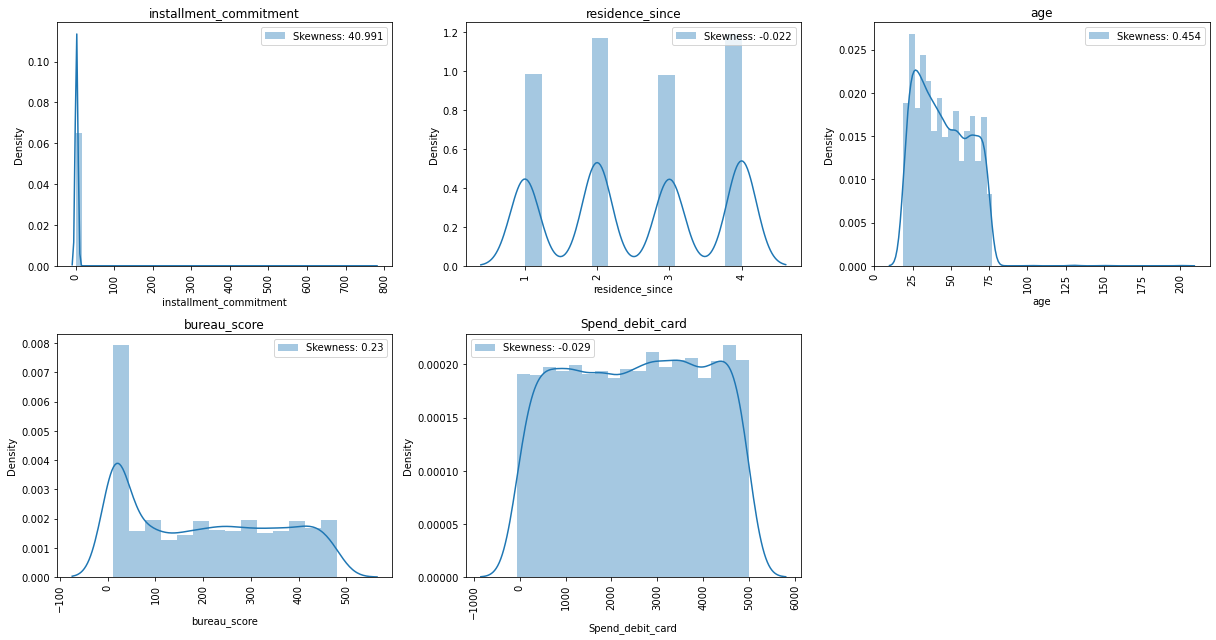

In [125]:
plt.rcParams['figure.figsize']=[17,9]
rows=2
columns=3
iterator=1
for k in df_num.columns:
    plt.subplot(rows,columns,iterator)
    sns.distplot(df.loc[:,k],label= 'Skewness:'+' '+str(round(df[k].skew(),3)))
    plt.title(k)
    plt.legend()
    iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout()    

**Interpretation**

* Installment commitement is highly right skewed. 
* Duration and credit amount are also right skewewd.
* Age has normal distribution.
* Rest all the numerical columns are slighly left skewed. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


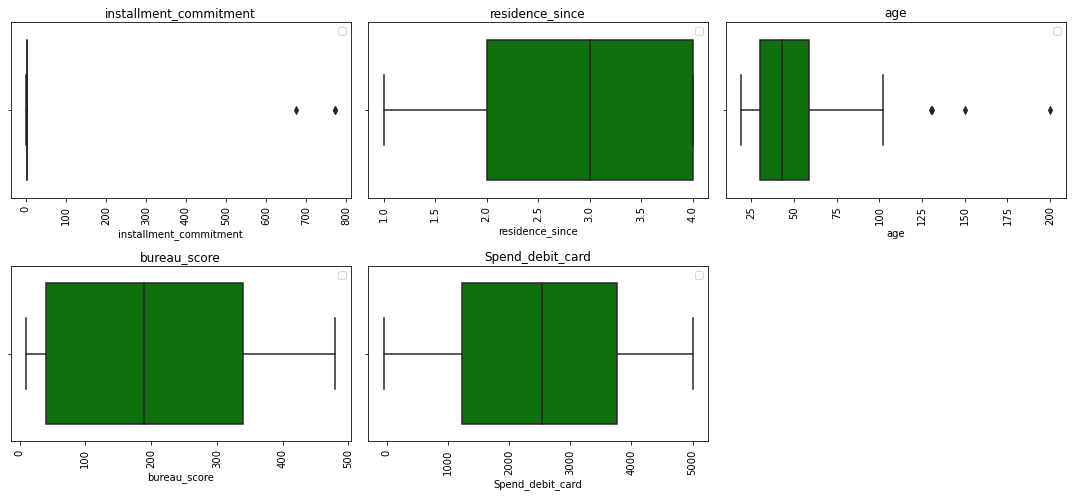

In [126]:
plt.rcParams['figure.figsize']=[15,7]
rows=2
columns=3
iterator=1
for k in df_num.columns:
    plt.subplot(rows,columns,iterator)
    sns.boxplot(df.loc[:,k],color='g')
    plt.title(k)
    plt.legend()
    iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout()    

**Interpretation**
* Bureau score, spend debit card, residence since  have no outliers.
* Age column has outliers. 

## 1.2 Categorical

In [127]:
ls=list(df_cat.columns)
ls.remove('Customer_id')

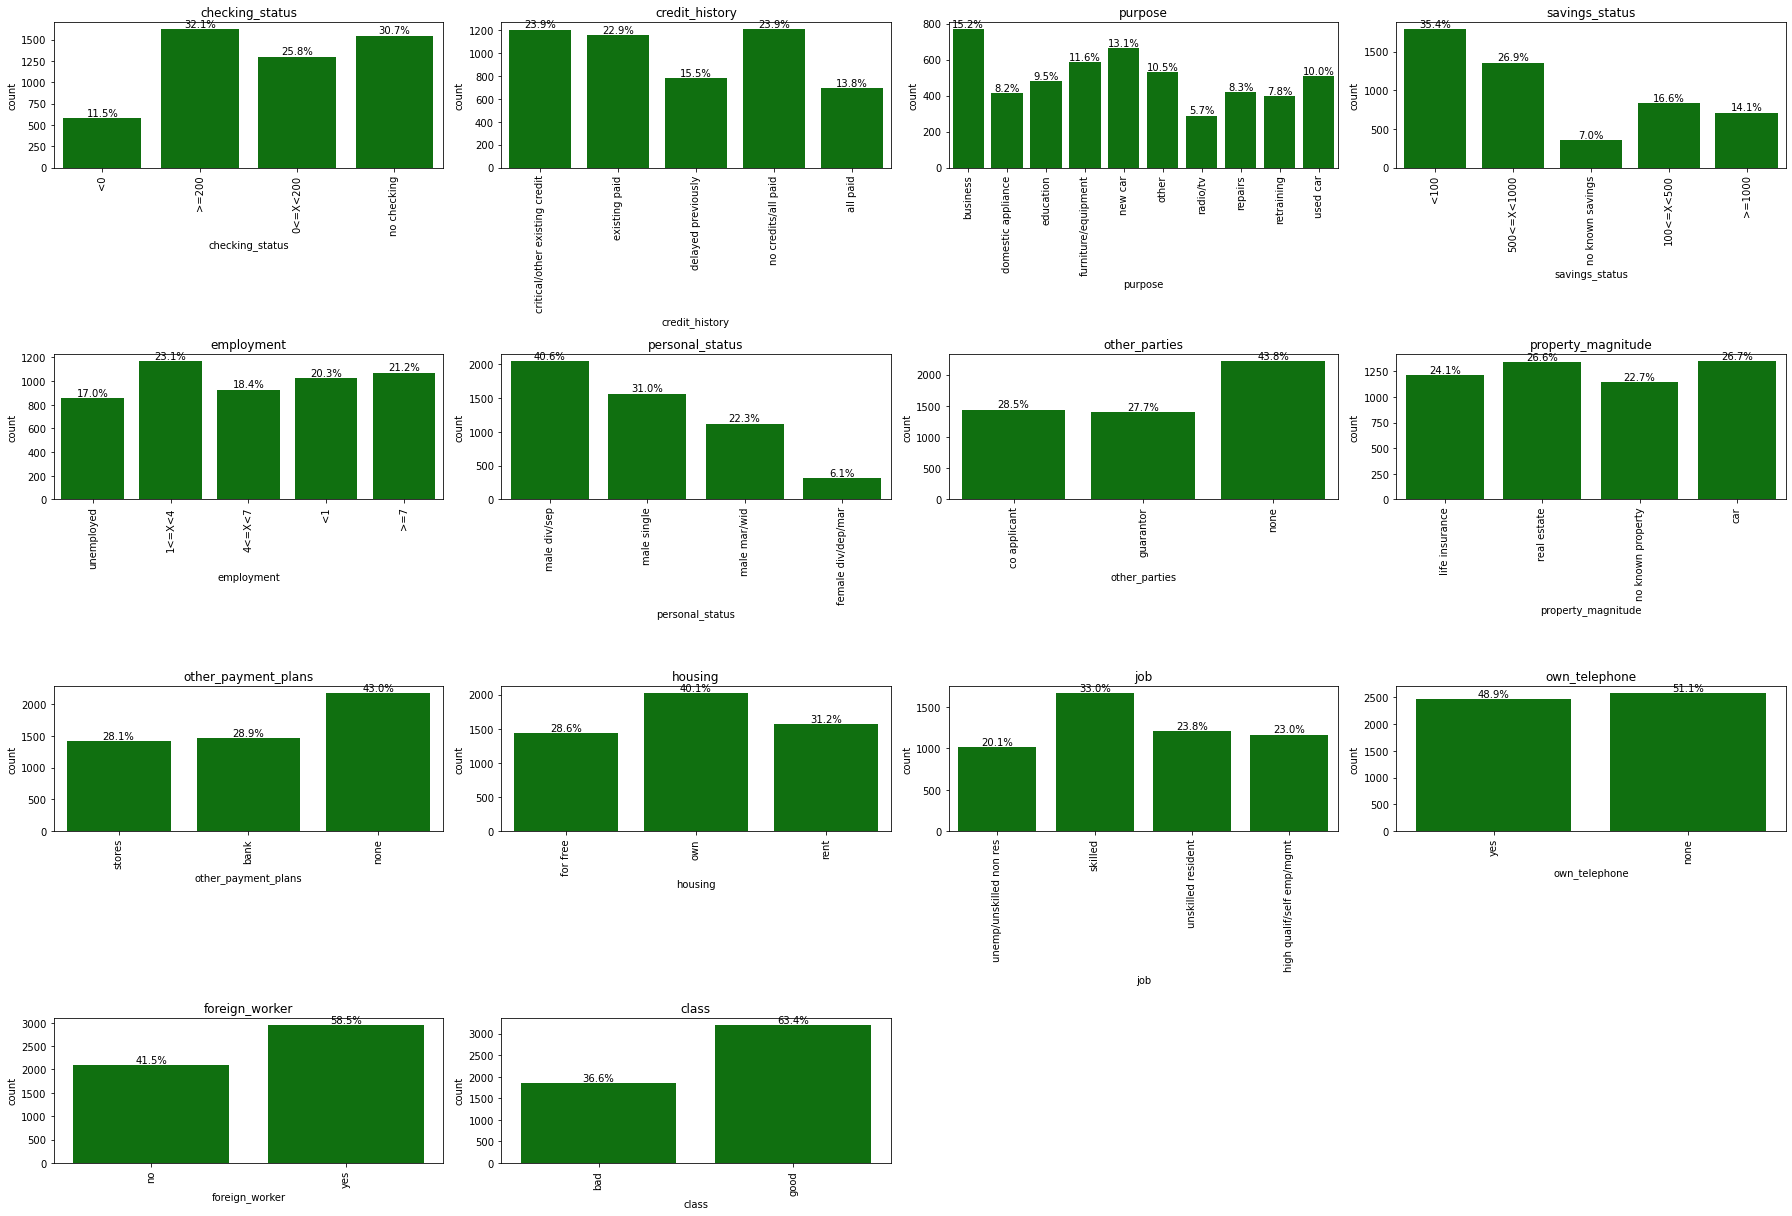

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [25, 17]
rows = 4
columns = 4
iterator = 1

for k in ls:
    plt.subplot(rows, columns, iterator)
    ax = sns.countplot(df.loc[:, k], color='g')
    plt.title(k)

    # Calculate percentages for each bar
    total_count = len(df.loc[:, k])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        x_pos = p.get_x() + p.get_width() / 2
        y_pos = p.get_height()
        ax.text(x_pos, y_pos, percentage, ha='center', va='bottom')

    iterator += 1
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


# 2. Bivariate Analysis

Bivariate analysis is the analysis of two variables (attributes)
Now, we will explore the association between each variable of the dataset and the target variable to find the relationship between them.

<a id="types_of_bivariate_analysis"> </a>

## Types of Bivariate Analysis
<html>
<body>

<ul>
Follwing are the types of bivariate analysis:<br>
    
  1. Numerical and Numerical<br>
  2. Categorical and Numerical<br>
  3. Categorical and Categorical<br>  
  
</ul>  
</body>
</html>

## 2.1 Numerical Vs Categorical

In [129]:
df_num.columns

Index(['installment_commitment', 'residence_since', 'age', 'bureau_score',
       'Spend_debit_card'],
      dtype='object')

## Swarmplot

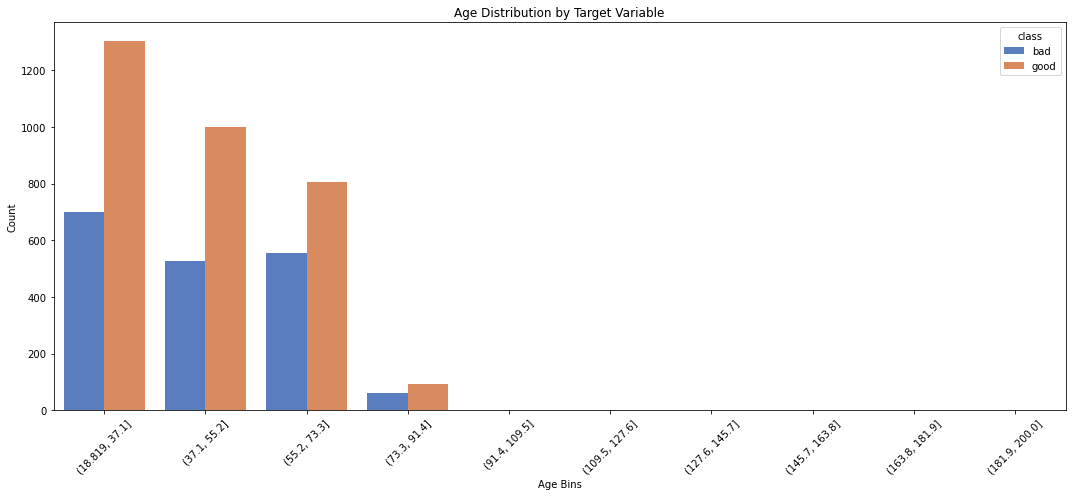

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=[15,7]

# Assuming 'df' is a pandas DataFrame containing the data
# and 'age' and 'target' are columns in the DataFrame

# Define the number of bins for age distribution
num_bins = 10

# Create age bins using pandas.cut
df['age_bin'] = pd.cut(df['age'], bins=num_bins)

# Create the countplot
sns.countplot(x='age_bin', hue='class', data=df, palette='muted')

# Add labels and title
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.title('Age Distribution by Target Variable')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


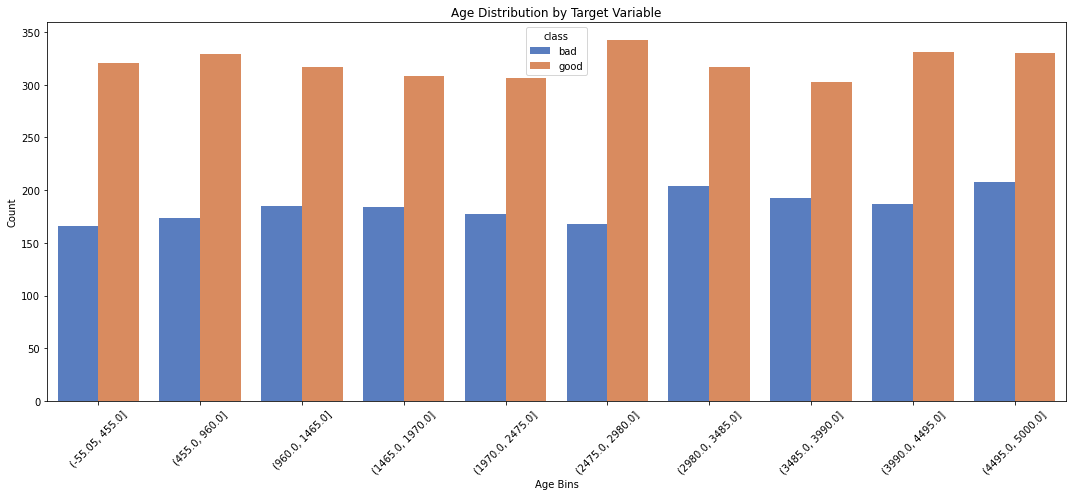

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=[15,7]

# Assuming 'df' is a pandas DataFrame containing the data
# and 'age' and 'target' are columns in the DataFrame

# Define the number of bins for age distribution
num_bins = 10

# Create age bins using pandas.cut
df['age_bin'] = pd.cut(df['Spend_debit_card'], bins=num_bins)

# Create the countplot
sns.countplot(x='age_bin', hue='class', data=df, palette='muted')

# Add labels and title
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.title('Age Distribution by Target Variable')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [132]:
ls=list(df_num.columns)
ls.remove('age')
ls.remove('Spend_debit_card')

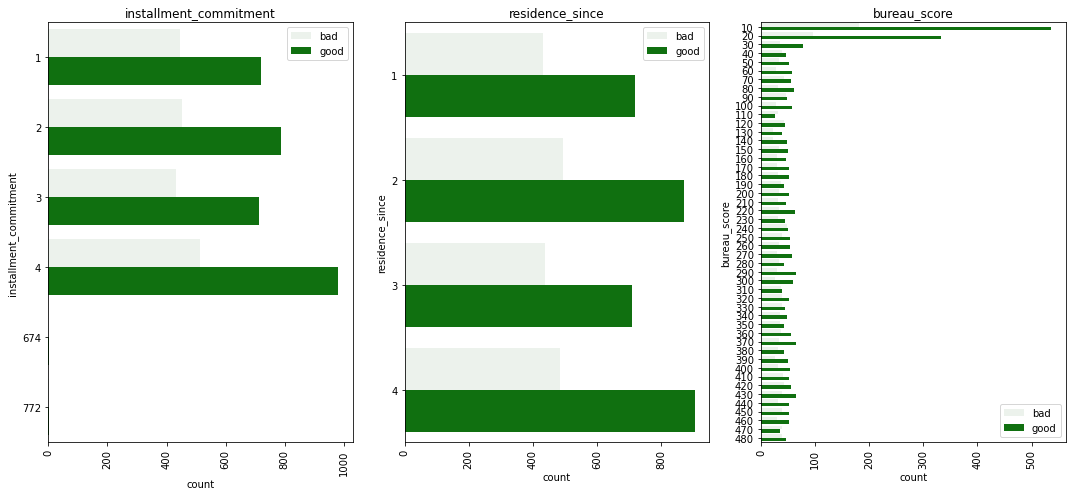

In [133]:
plt.rcParams['figure.figsize']=[15,7]
rows=1
columns=3
iterator=1
for k in ls:
    plt.subplot(rows,columns,iterator)
    sns.countplot(y=df.loc[:,k],hue=df['class'],color='g')
    plt.title(k)
    plt.legend()
    iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout()    

<a id="multi"> </a>
# 3. Multivariate Analysis

Multivariate analysis is used to study two or more variables in the data. The main purpose is to understand the relationship between the variables using various statistical and visualization techniques. The analysis helps to find the variables which are highly correlated to each other; also, it exhibits the effect of one variable on other variables in the data. </b>

## 3.1 Graphs with hue

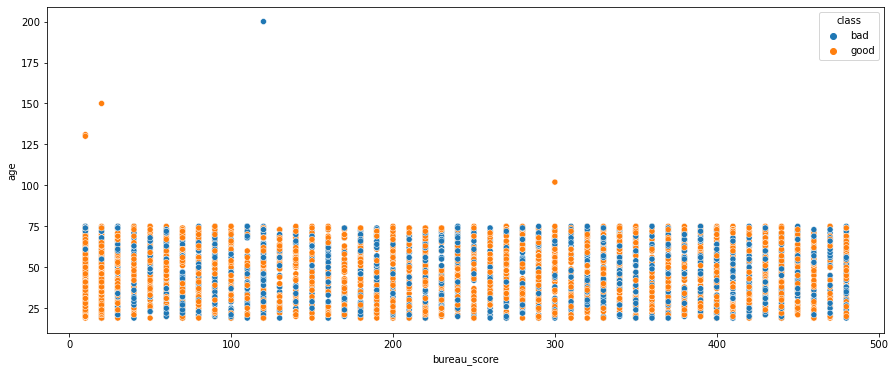

In [135]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df,x='bureau_score',y='age',hue='class')
plt.show()

uniform distribution

## 3.2 Pairplot

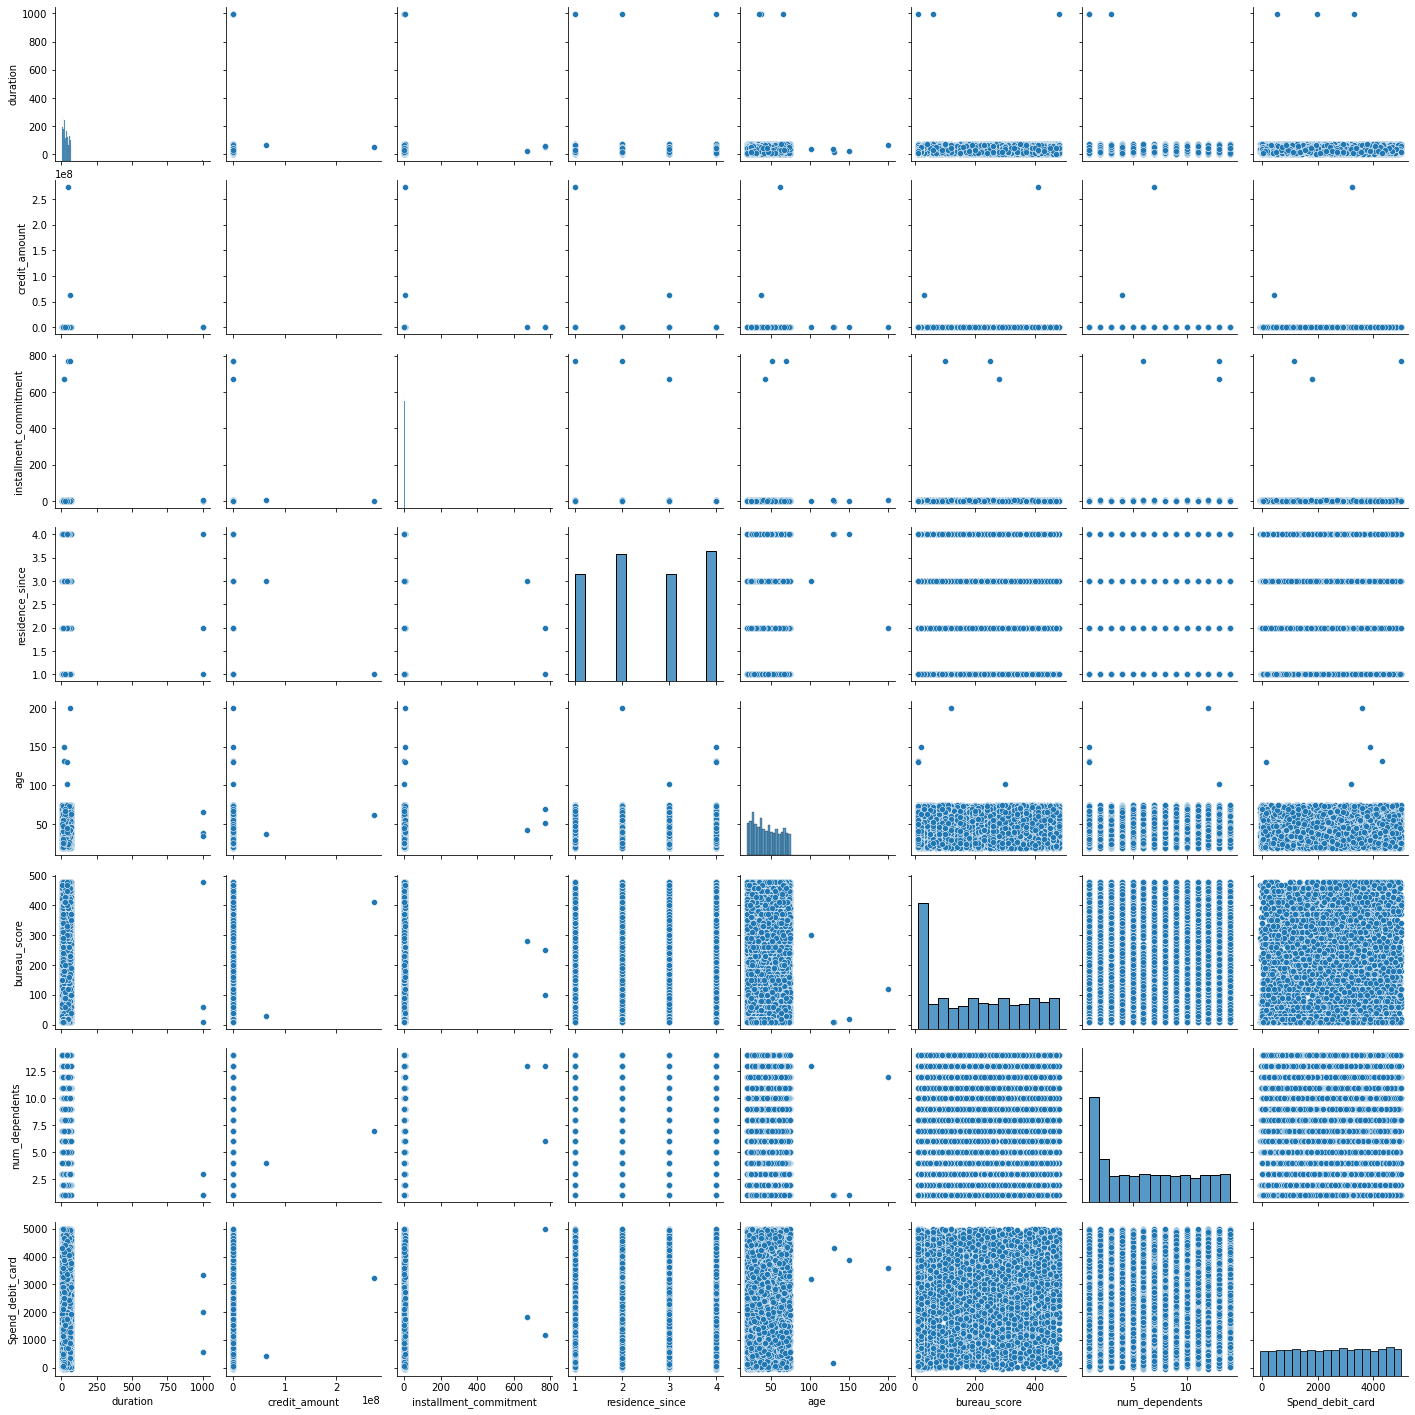

In [136]:
sns.pairplot(df)

### 3.3 Heatmap with Correlation

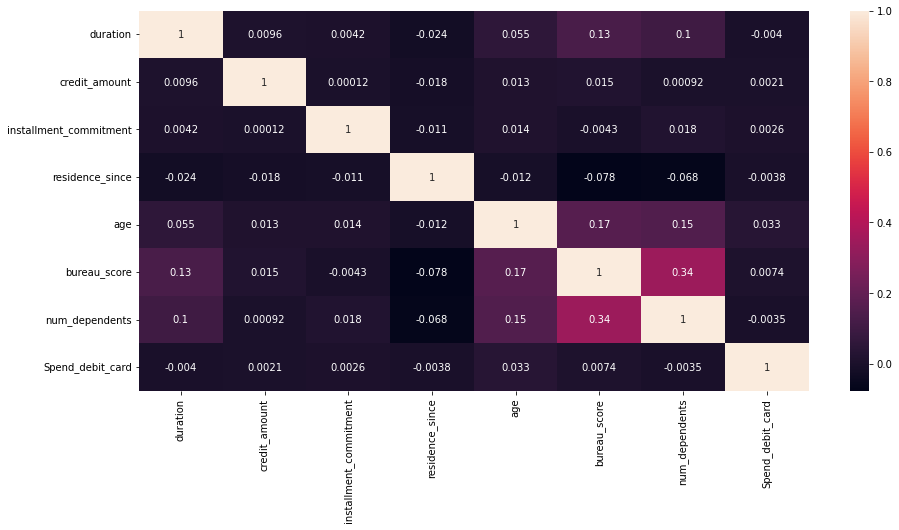

In [31]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# 4. Missing Value Analysis and Treatment


In [32]:
Total = df.isnull().sum().sort_values(ascending=False)          
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
housing,8,0.158416
num_dependents,7,0.138614
savings_status,5,0.099010
duration,2,0.039604
credit_amount,2,0.039604
property_magnitude,1,0.019802
employment,1,0.019802
other_payment_plans,0,0.000000
class,0,0.000000
Spend_debit_card,0,0.000000


**Interpretation -** There are few null values in columns housing,num_dependants,savings_status,duration,credit_amount,property_magnitude,employement. Since they are less than 1%, we will drop them.

In [33]:
# Dropping the null values. 
df.dropna(inplace=True)

<a id="outliers"></a>
# 5. Outliers

An outlier is an observation in the data that lies at an abnormal distance from other values. Presence of an outlier may skew the results. Hence it is necessary to remove them.

# Identifying the Outliers


## 5.1 Based on Boxplots:

The boxplot() in seaborn plots a box plot of the specified data. The box represents the quartiles of the data while the whiskers extend to show the rest of the distribution. The points that are determined to be outliers are identified using  the interquartile range (IQR) method.

<a id="iqr"></a>
## 5.2. Based on IQR

The IQR method can be used when the data distribution in non-normal. Also the quartiles are less affected by the extreme values.

In [34]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(5018, 24)

## 5.3 Based on Z-score

Z-score of a value is the difference between that value and the mean, divided by the standard deviation. If the z-score greater than 3 or less than -3, indicates an outlier value. This method is useful when the data distribution is normal. 

This method has a disadvantage that the values of mean and standard deviation are highly affected by the presence of outliers.

In [35]:
df1=Data.copy()

In [36]:
df1.shape

(5050, 23)

In [37]:
sc=StandardScaler()
scalled_df=sc.fit_transform(df_num)
scalled_df=pd.DataFrame(scalled_df,columns=df_num.columns)

In [38]:
scalled_df = scalled_df[((scalled_df<3)|(scalled_df>-3))]

Outiers identified using Z-Score

## 6. Remove Insignificant Variables

The column `Customer_id` contains the serial number of the student, which is redundant for further analysis. Thus, we drop the column.

In [39]:
df = df.drop('Customer_id', axis = 1)

# Statistical Significance

In [40]:
static_val=[]
pvalue=[]
for k in df_num.columns:
    s1=df[df['class']==0][k]
    s2=df[df['class']==1][k]
    static,pval=ttest_ind(s1,s2)
    static_val.append(static)
    pvalue.append(pval)
    dic={'static_val':static_val,'pvalue':pvalue}
num_test_df=pd.DataFrame(dic)
num_test_df
num_test_df['Features']=df_num.columns
non_significant=num_test_df[num_test_df['pvalue']>0.05]
l=non_significant.Features.to_list()
print(l)
num=df_num.drop(l,axis=1)    

[]


**Interpretation -** All the numerical features are statistically significant

In [41]:
p_value=[]
for i in df_cat.columns:
    obs_val=pd.crosstab(df_cat[i],df['class'])
    stat,p_val,dof,exp=chi2_contingency(obs_val.values)
    p_value.append(p_val)

cat_stats=pd.DataFrame(p_value,index=df_cat.columns,columns=['p_value'])
cat_non_significant=cat_stats[cat_stats['p_value']>0.05]
l1=cat_non_significant.index.to_list()
print(l1)
cat=df_cat.drop(l1,axis=1)
    

['Customer_id', 'employment', 'own_telephone']


**Interpretation** employment & own_telephone are statistically insignificant for analysis

In [42]:
#Dropping the insignificant variables-
df.drop(['employment', 'own_telephone'],axis=1,inplace=True)

##  Encoding the Categorical Variables

The data may contain numerical as well as categorical variables. Machine learning algorithms are designed to work with numerical data. Thus, it is necessary to convert the categorical variables into a numeric type. Different techniques are available to perform such conversion.

In [43]:
df_cat = df.select_dtypes(include='object')

In [44]:
df_cat.describe().T
    

,count,unique,top,freq
checking_status,5018,4,>=200,1620
credit_history,5018,5,no credits/all paid,1209
purpose,5018,10,business,765
savings_status,5018,5,<100,1773
personal_status,5018,4,male div/sep,2034
other_parties,5018,3,none,2196
property_magnitude,5018,4,car,1343
other_payment_plans,5018,3,none,2155
housing,5018,3,own,2012
job,5018,4,skilled,1655


## Ordinal encoding

Ordinal encoding can be used to encode the ordinal variable with the values from 0 to (n-1) for 'n' distinct categories. We can pass the order to the encoder to assign the categories in the variable. 

During the Analysis some features have a order hence ordinal encoding.

In [45]:
df.checking_status.replace({'<0':1,'no checking':0,'0<=X<200':2,'>=200':3},inplace=True)
df.savings_status.replace({'<100':1,'no checking':0,'100<=X<500':2,'500<=X<1000':3,'>=1000':4},inplace=True)
df.other_parties.replace({'none':0,'co applicant':1,'guarantor':2},inplace=True)
df.housing.replace({'rent':1,'for free':0,'own':2},inplace=True)
df.foreign_worker.replace({'yes':1,'no':0},inplace=True)
df['class'].replace({'good':1,'bad':0},inplace=True)

## Dummy Encoding

It is used to create dummy variables from a single categorical variable. We can create a dummy variable corresponding to each level of the categorical variable. The dummy variable contains values as '0' and '1' based on the presence or absence of the category in the corresponding observation.

Rest of the categorical features are dummy encoded

In [46]:
df = pd.get_dummies(data = df, drop_first = True)

##  Scale the Data 

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

### Standard Scaler

The StandardScaler() is present in the sklearn library that normalizes the data such that the mean is zero and standard deviation is 1. This method does not change the shape of the original distribution.

In [47]:
X_scaler = StandardScaler()
df[['installment_commitment','residence_since','age','bureau_score','Spend_debit_card']] = X_scaler.fit_transform(df[['installment_commitment','residence_since','age','bureau_score','Spend_debit_card']])


In [48]:
df.to_csv('preprocessed_data.csv',index=False)

##  Train-Test Split

In [49]:
x=df.drop('class',axis=1)
y=df['class']

Before applying various classification techniques to predict the admission status of the student, let us split the dataset in train and test set.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.3)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (3512, 49)
y_train (3512,)
X_test (1506, 49)
y_test (1506,)


#### Create a generalized function to calculate the metrics for the train and the test set.

In [51]:
def get_train_report(model):
    train_pred = model.predict(X_train)
    return(classification_report(y_train, train_pred))

In [52]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

# 7. Decision Tree for Classification

Decision Tree is a non-parametric supervised learning method. It builds a model in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets, which is called splitting. A decision node is a node on which a decision of split is to be made. A node that can not be split further is known as the terminal/leaf node. A leaf node represents the decision. A decision tree can work with both numerical and categorical variables.

A decision tree for classification is built using criteria like the Gini index and entropy.

#### Build a full decision tree model on a train dataset using 'entropy'.

In [53]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train, y_train)

#### Plot a decision tree.

To visualize our decision tree we will use 'plot_tree'

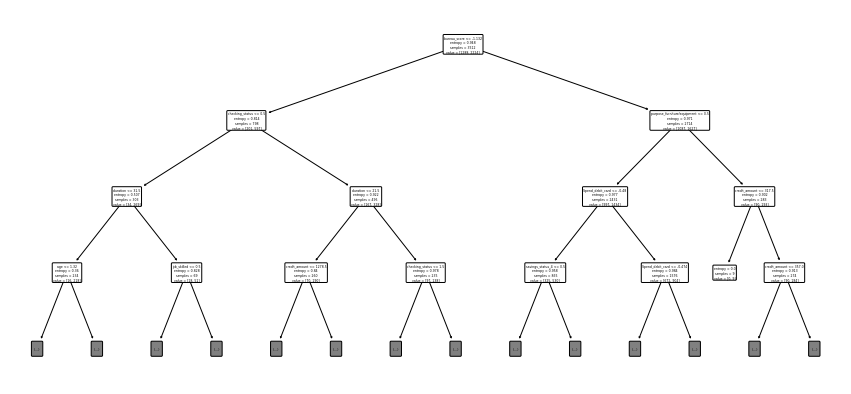

In [54]:
tree.plot_tree(decision_tree,max_depth=3,feature_names=X_train.columns,rounded=True)
plt.show()

## Over-fitting in Decision Tree

The decision tree is said to be over-fitted if it tries to perfectly fit all the observations in the training data. We can calculate the difference between the train and test accuracy to identify if there is over-fitting.

**Calculate performance measures on the train set.**

In [55]:
train_report = get_train_report(decision_tree)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1288
           1       1.00      1.00      1.00      2224

    accuracy                           1.00      3512
   macro avg       1.00      1.00      1.00      3512
weighted avg       1.00      1.00      1.00      3512



**Calculate performance measures on the test set.**

In [56]:
test_report = get_test_report(decision_tree)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.39      0.39      0.39       548
           1       0.65      0.65      0.65       958

    accuracy                           0.55      1506
   macro avg       0.52      0.52      0.52      1506
weighted avg       0.55      0.55      0.55      1506



**Interpretation:** From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

## 7.1 Tune the Hyperparameters using GridSearchCV (Decision Tree)

In [57]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
 

decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)
tree_grid_model = tree_grid.fit(X_train, y_train)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2} 



#### Build the model using the tuned hyperparameters.

In [58]:
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

dt_model = dt_model.fit(X_train, y_train)

**Calculate performance measures on the train set.**

In [59]:
print('Classification Report for train set: \n', get_train_report(dt_model))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1288
           1       0.63      1.00      0.78      2224

    accuracy                           0.63      3512
   macro avg       0.32      0.50      0.39      3512
weighted avg       0.40      0.63      0.49      3512



**Calculate performance measures on the test set.**

In [60]:
print('Classification Report for test set: \n', get_test_report(dt_model))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       548
           1       0.64      1.00      0.78       958

    accuracy                           0.64      1506
   macro avg       0.32      0.50      0.39      1506
weighted avg       0.40      0.64      0.49      1506



**Interpretation:** From the above output, we can see that there is no significant difference between the train and test accuracy; thus, we can conclude that the decision tree after tuning the hyperparameters avoids the over-fitting of the data.

# 7. Random Forest for Classification

It is the method of constructing multiple decision trees on randomly selected data samples. We can use the bootstrap sampling method to select the random samples of the same size from the dataset to construct multiple trees. This method is used for both regression and classification analysis. The random forest returns the prediction based on all the individual decision trees prediction. For regression, it returns the average of all the predicted values; and for classification, it returns the class, which is the mode of all the predicted classes. 

It avoids the over-fitting problem as it considers a random data sample to construct a decision tree.

In [61]:
rf_classification = RandomForestClassifier()
rf_model = rf_classification.fit(X_train, y_train)

**Calculate performance measures on the train set.**

In [62]:
train_report = get_train_report(rf_model)

# print the performace measures
print(train_report) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1288
           1       1.00      1.00      1.00      2224

    accuracy                           1.00      3512
   macro avg       1.00      1.00      1.00      3512
weighted avg       1.00      1.00      1.00      3512



**Calculate performance measures on the test set.**

In [63]:
test_report = get_test_report(rf_model)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.38      0.09      0.15       548
           1       0.64      0.91      0.75       958

    accuracy                           0.61      1506
   macro avg       0.51      0.50      0.45      1506
weighted avg       0.54      0.61      0.53      1506



**Interpretation:** From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the random forest is over-fitted on the train data.

## 4.1 Tune the Hyperparameters using GridSearchCV (Random Forest)

In [64]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10} 



#### Build the model using the tuned hyperparameters.

In [65]:
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

rf_model = rf_model.fit(X_train, y_train)
print('Classification Report for test set:\n', get_test_report(rf_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       548
           1       0.64      1.00      0.78       958

    accuracy                           0.64      1506
   macro avg       0.32      0.50      0.39      1506
weighted avg       0.40      0.64      0.49      1506



### Identify the Important Features using Random Forest

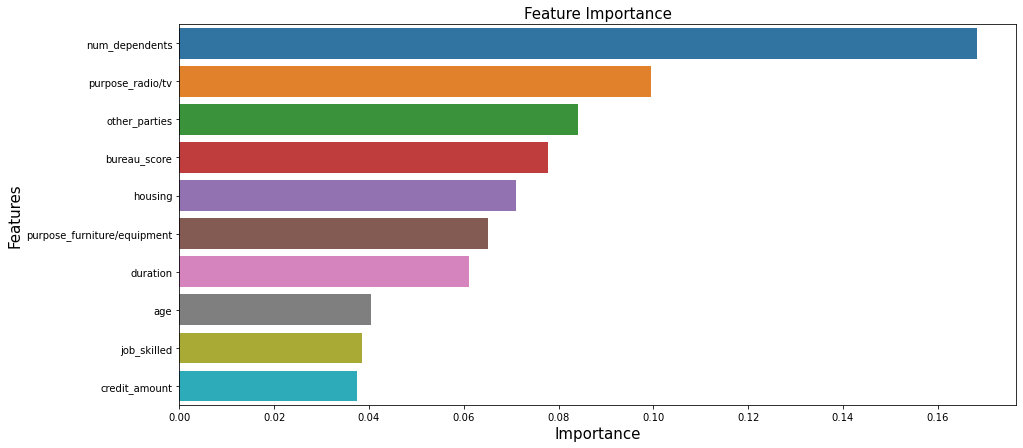

In [75]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
important_features=important_features.iloc[0:10]
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

#### Define a function to plot the confusion matrix.

In [67]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model, test_data):
    y_pred = model.predict(test_data)
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    
    plt.show()

#### Define a function to plot the ROC curve.

In [68]:
def plot_roc(model, test_data):
    
    y_pred_prob = model.predict_proba(test_data)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

# 3. K Nearest Neighbors (KNN)

KNN is a classification machine learning algorithm used to identify the class of the observation. This algorithm search for `K` nearest points to determine the class of an observation. To identify the nearest points, it considers the distance metrics like `Euclidean`, `Manhattan`, `Chebyshev`, `Hamming`, and so on.

#### Build a knn model on a training dataset using euclidean distance (Standardized Data)

In [71]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn_classification.fit(X_train, y_train)

#### Build a confusion matrix.

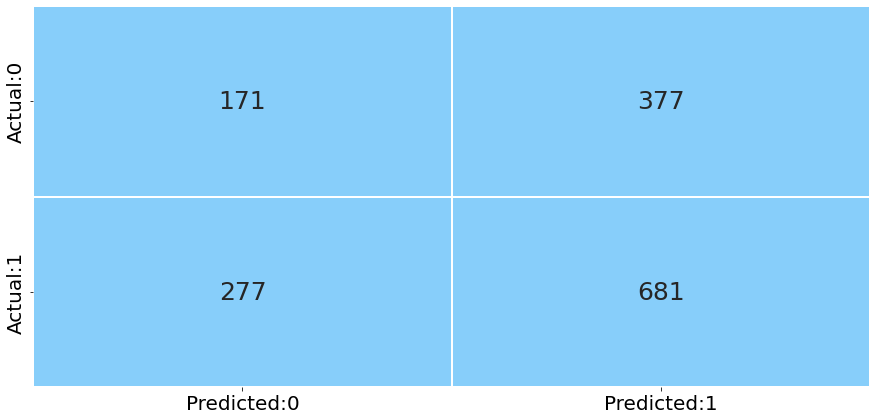

In [76]:
plot_confusion_matrix(knn_model, test_data = X_test)

**Calculate performance measures on the test set.**

In [78]:
test_report = get_test_report(knn_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.38      0.31      0.34       548
           1       0.64      0.71      0.68       958

    accuracy                           0.57      1506
   macro avg       0.51      0.51      0.51      1506
weighted avg       0.55      0.57      0.55      1506



**Plot the ROC curve.**

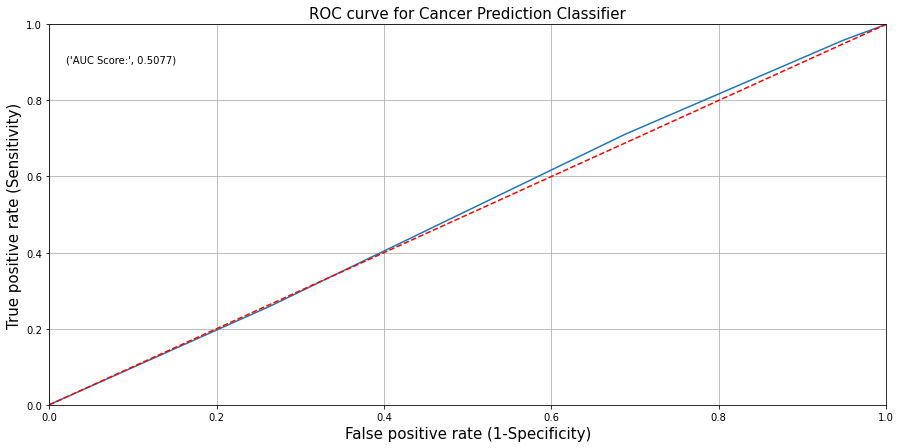

In [79]:
plot_roc(knn_model, test_data = X_test)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that our classifier (knn_model with n_neighbors = 3) is away from the dotted line; with the AUC score 0.9991.

## 3.1 Optimal Value of K (using GridSearchCV)

In [86]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

knn_grid.fit(X_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'hamming', 'n_neighbors': 21} 



#### Draw a line plot to see the error rate for each value of K using euclidean distance as a metric of KNN model

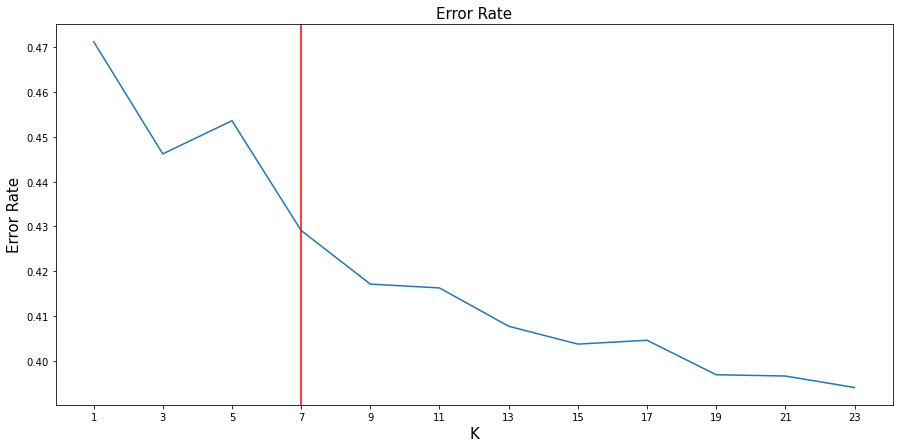

In [87]:
# consider an empty list to store error rate
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,25,2):
    

    knn = KNeighborsClassifier(i, metric = 'euclidean')

    score = cross_val_score(knn, X_train, y_train, cv = 5)

    score = score.mean()
    error_rate.append(1 - score)
    
plt.plot(range(1,25,2), error_rate)
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

plt.xticks(np.arange(1, 25, step = 2))

plt.axvline(x = 7, color = 'red')

# display the plot
plt.show()

**Interpretation:** We can see that the optimal value of K (= 7) obtained from the GridSearchCV() results in a lowest error rate. 

**Calculate performance measures on the test set.**

In [89]:
print('Classification Report for test set: \n', get_test_report(knn_grid))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.43      0.14      0.21       548
           1       0.64      0.89      0.75       958

    accuracy                           0.62      1506
   macro avg       0.54      0.52      0.48      1506
weighted avg       0.57      0.62      0.55      1506



**Plot the ROC curve.**

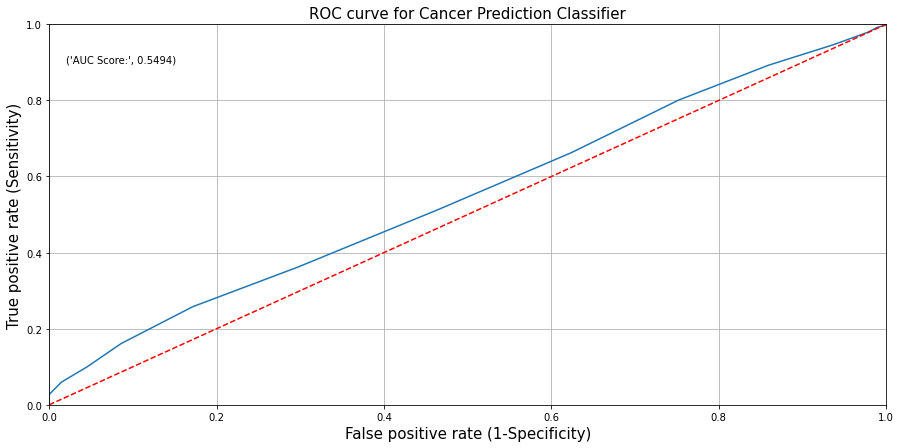

In [90]:
plot_roc(knn_grid, test_data=X_test)

**Interpretation:** From the above plot, we can see that our classifier (knn_model with n_neighbors = 7) is away from the red dotted line (i.e on the axes); with the AUC score 1.0.

# 4. Naive Bayes Algorithm

It uses a `Bayes' Theorem` with the assumption of independence of predictor variables. The sklearn library provides different naive bayes classifiers, as `GaussianNB`, `MultinomialNB` and so on. 

#### Build a naive bayes model on a training dataset.

In [81]:
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(X_train, y_train)

#### Build a confusion matrix.

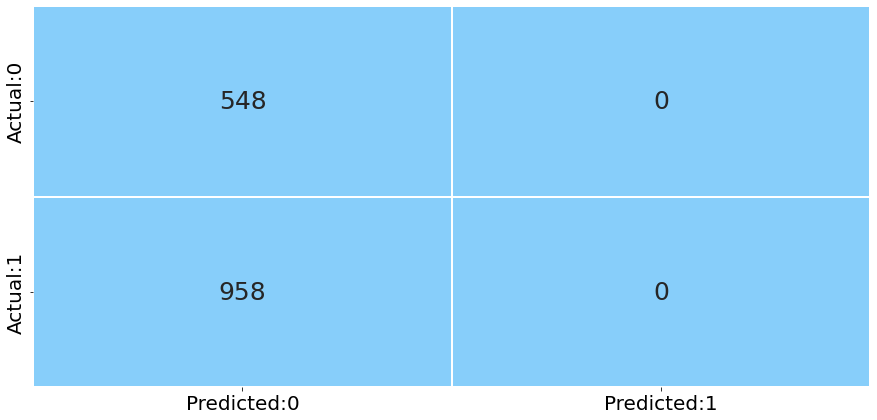

In [82]:
plot_confusion_matrix(gnb_model, test_data=X_test)

**Calculate performance measures on the test set.**

In [83]:
test_report = get_test_report(gnb_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.36      1.00      0.53       548
           1       0.00      0.00      0.00       958

    accuracy                           0.36      1506
   macro avg       0.18      0.50      0.27      1506
weighted avg       0.13      0.36      0.19      1506



**Plot the ROC curve.**

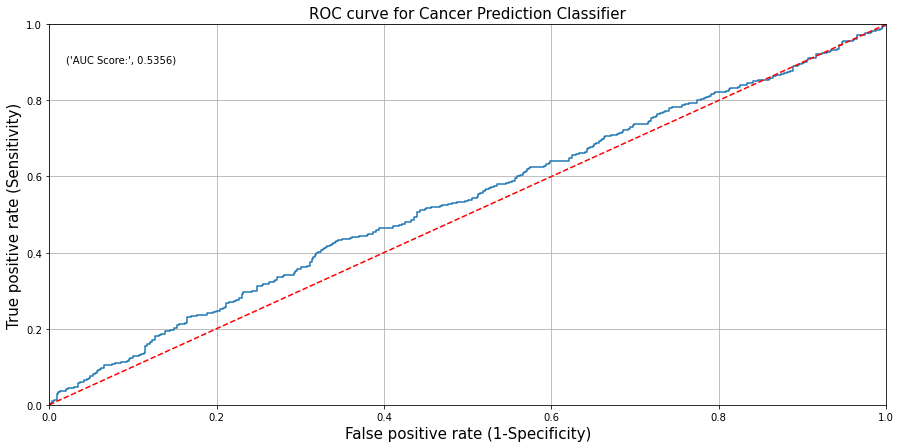

In [84]:
plot_roc(gnb_model, test_data=X_test)

**Interpretation:** From the above plot, we can see that our classifier (gnb_model) is away from the red dotted line; with the AUC score 0.53.

# 5. Comparison between KNN Model and Naive Bayes Model

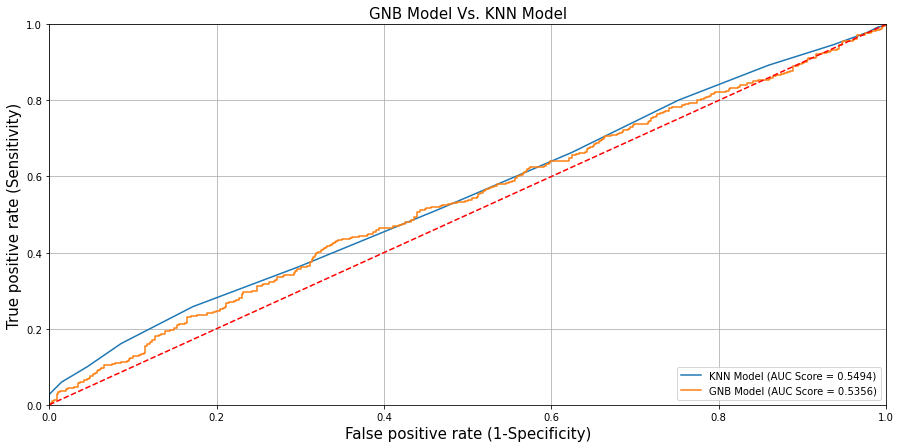

In [91]:
# K Nearest Neighbors
y_pred_prob_knn = knn_grid.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)

auc_score_knn = roc_auc_score(y_test, y_pred_prob_knn)

plt.plot(fpr, tpr, label='KNN Model (AUC Score = %0.4f)' % auc_score_knn)

y_pred_prob_gnb = gnb_model.predict_proba(X_test)[:,1]
    
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gnb)
auc_score_gnb = roc_auc_score(y_test, y_pred_prob_gnb)

plt.plot(fpr, tpr, label='GNB Model (AUC Score = %0.4f)' % auc_score_gnb)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')
plt.title('GNB Model Vs. KNN Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.legend(loc = 'lower right')

plt.grid(True)

**Interpretation:** The Auc Score of KNN Model is slightly higher than that of Gaussian Naive Bayes model. Also KNN model is more stable than Gaussian Naive Bayes model.

# 3. Boosting Methods

The Ensemble technique considers multiple models for predicting the results. `Bagging` and `Boosting` are two of the types of ensembles. The bagging methods construct the multiple models in parallel; whereas, the boosting methods construct the models sequentially.

Earlier, we have studied one of the bagging (bootstrap aggregating) technique i.e. `Random Forest`.

The boosting method fits multiple weak classifiers to create a strong classifier. In this method, the model tries to correct the errors in the previous model. In this section, we learn some of the boosting methods such as `AdaBoost`, `Gradient Boosting` and `XGBoost`.

## 3.1 AdaBoost

Let us build the AdaBoost classifier with decision trees. The model creates several stumps (decision tree with only a single decision node and two leaf nodes) on the train set and predicts the class based on these weak learners (stumps). For the first model, it assigns equal weights to each sample. It assigns the higher weight for the wrongly predicted samples and lower weight for the correctly predicted samples. This method continues till all the observations are correctly classified or the predefined number of stumps is created

In [92]:
#### Build an Adaboost model on a training dataset.

In [93]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

#### Plot the confusion matrix.

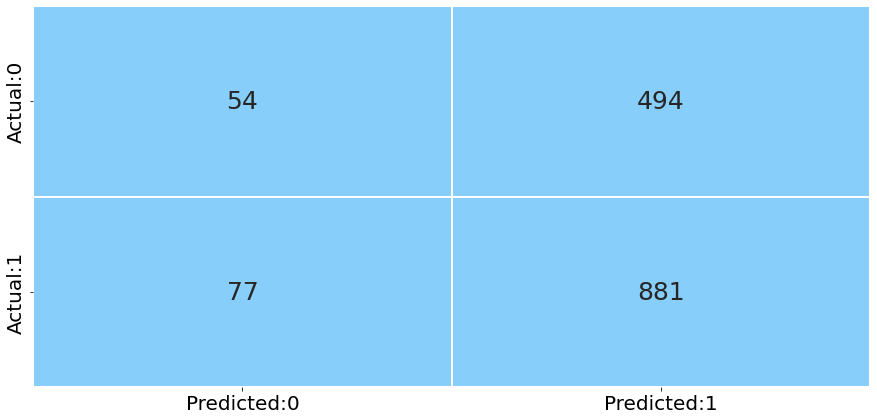

In [95]:
plot_confusion_matrix(ada_model, test_data=X_test)

**Calculate performance measures on the test set.**

In [96]:
test_report = get_test_report(ada_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.41      0.10      0.16       548
           1       0.64      0.92      0.76       958

    accuracy                           0.62      1506
   macro avg       0.53      0.51      0.46      1506
weighted avg       0.56      0.62      0.54      1506



**Interpretation:** The output shows that the model is 62% accurate.

#### Plot the ROC curve.

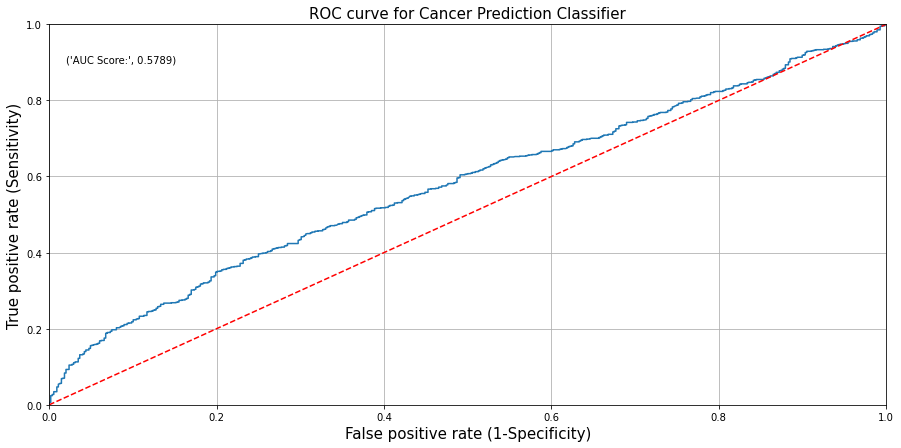

In [99]:
plot_roc(ada_model, test_data=X_test)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the AdaBoost model is away from the dotted line; with the AUC score 0.5789.

## 3.2 Gradient Boosting

This method optimizes the differentiable loss function by building the number of weak learners (decision trees) sequentially. It considers the residuals from the previous model and fits the next model to the residuals. The algorithm uses a gradient descent method to minimize the error.

#### Build a gradient boosting model on a training dataset.

In [101]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

#### Plot the confusion matrix.

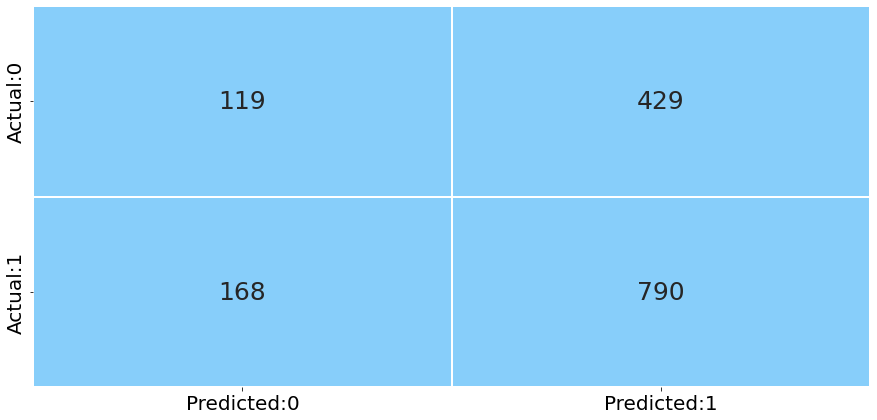

In [103]:
plot_confusion_matrix(gboost_model, test_data=X_test)

**Calculate performance measures on the test set.**

In [104]:
test_report = get_test_report(gboost_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.41      0.22      0.29       548
           1       0.65      0.82      0.73       958

    accuracy                           0.60      1506
   macro avg       0.53      0.52      0.51      1506
weighted avg       0.56      0.60      0.57      1506



**Interpretation:** The classification report shows that the model is 60% accurate. Also, the sensitivity and specificity are equal.

#### Plot the ROC curve.

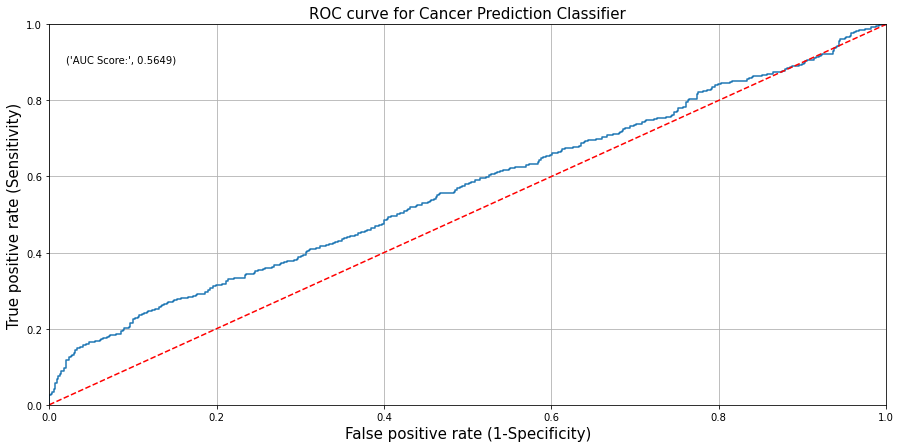

In [105]:
plot_roc(gboost_model, test_data=X_test)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the gradient boosting model is away from the dotted line; with the AUC score 0.8954.

In [ ]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': gboost_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
important_features=important_features.iloc[0:10]
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

# Final Interpretation

Based on the analysis and modeling conducted, we have identified several key factors that highly impact our target variable. These factors include:

Credit Score: The credit score of a customer plays a significant role in determining their creditworthiness. A higher credit score suggests that the individual has a strong credit history, making them more reliable and less likely to default on their financial obligations. As a result, customers with higher credit scores are more likely to be approved for loans and credit cards, and they may also receive better interest rates and favorable terms. To capitalize on this insight, we should focus our marketing efforts on attracting customers with high credit scores and tailor our products and offers to meet their needs.

Spend Debit Card: The spending behavior of customers using debit cards is crucial in predicting their financial stability and risk profile. Customers who demonstrate responsible spending habits and maintain a steady pattern of debit card usage are more likely to be financially disciplined, reducing the chances of defaulting on loans or credit card payments. We can leverage this finding to create targeted campaigns and incentives to encourage more customers to use debit cards for their transactions, thereby fostering a financially responsible customer base.

Duration: The duration of a customer's relationship with our institution is an essential factor. Longer relationships indicate loyalty and trust in our services. Customers who have been with us for an extended period are more likely to continue using our products and services, which could lead to increased customer retention and potentially higher cross-selling opportunities. We should prioritize retaining existing customers by offering loyalty programs and personalized benefits to strengthen our long-term relationships.

Age: Age is an influential factor in determining creditworthiness and financial stability. Typically, older customers tend to have more established financial histories and are less likely to engage in high-risk behaviors. However, it's essential to strike a balance as targeting only older customers might lead to missing out on younger customers who could be equally responsible and valuable. Therefore, our marketing strategy should aim to attract customers from a wide age range while considering age-specific product offerings and communication styles.

Bureau Score: The bureau score, which reflects a customer's overall credit performance, is a critical metric for assessing credit risk. A high bureau score indicates a positive credit history, while a low score signals potential credit challenges or previous delinquencies. By leveraging bureau scores, we can segment our customer base more effectively, tailoring financial products and credit limits to match their creditworthiness. Additionally, we should focus on helping customers with lower bureau scores to improve their financial health through financial education and credit-building programs.

In conclusion, this analysis highlights the importance of using data-driven insights to optimize our business strategies. By considering the impact of credit score, spend debit card behavior, duration, age, and bureau score on our target variable, we can enhance customer targeting, improve risk assessment, and develop tailored products and services. This proactive approach will not only result in increased profitability and customer satisfaction but also strengthen our position in the market by establishing ourselves as a customer-centric and responsible financial institution.